In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os
from PIL import Image

In [5]:
data = []
labels = []
classess = 43
cur_path = os.getcwd()
for i in range(classess):
    path = os.path.join(cur_path,'datasets','Train',str(i))
    print(path)
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
#             print(len(image))
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error in Loading Image: {e}")
data = np.array(data)
labels = np.array(labels)

c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\0


c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\1
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\2
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\3
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\4
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\5
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\6
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\7
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\8
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\9
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\10
c:\Users\HP\Desktop\Programming\Projects\Deep Learning Project\01 Traffic\datasets\Train\

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [9]:
print(x_train.shape, x_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3)


In [10]:
print(y_train.shape, y_test.shape)

(31367,) (7842,)


In [11]:
y_train[0]

36

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test, 43)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
epochs = 15
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 64s 56ms/step - accuracy: 0.5645 - loss: 1.7783 - val_accuracy: 0.9697 - val_loss: 0.1197
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9573 - loss: 0.1483 - val_accuracy: 0.9915 - val_loss: 0.0371
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9765 - loss: 0.0852 - val_accuracy: 0.9936 - val_loss: 0.0259
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9815 - loss: 0.0635 - val_accuracy: 0.9927 - val_loss: 0.0235
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9950 - val_loss: 0.0184
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.9876 - loss: 0.0392 - val_accuracy: 0.9950 - val_loss: 0.0185
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.9854 - loss: 0.0457 - val_accuracy: 0.9935 - val_loss: 0.0234
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9913 - loss: 0.0298 - 

In [17]:
model.save("model2.h5")

In [18]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('C:/Users/HP/Desktop/Programming/Projects/Deep Learning Project/01 Traffic/datasets/Test.csv')
labels = y_test['ClassId'].values
img = y_test['Path'].values

In [19]:
data = []

for i in img:
    path = 'C:/Users/HP/Desktop/Programming/Projects/Deep Learning Project/01 Traffic/datasets'
    image = Image.open(path +'//'+i)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)


In [27]:
pred = model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [28]:
pred_classes = np.argmax(pred, axis=1)

In [29]:
print(accuracy_score(labels, pred_classes))

0.9640538400633413


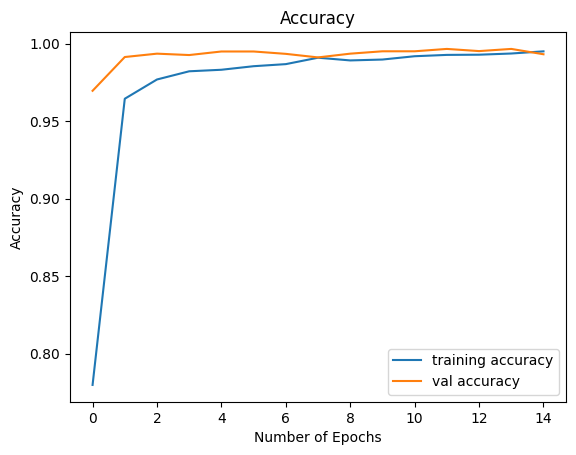

In [30]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()


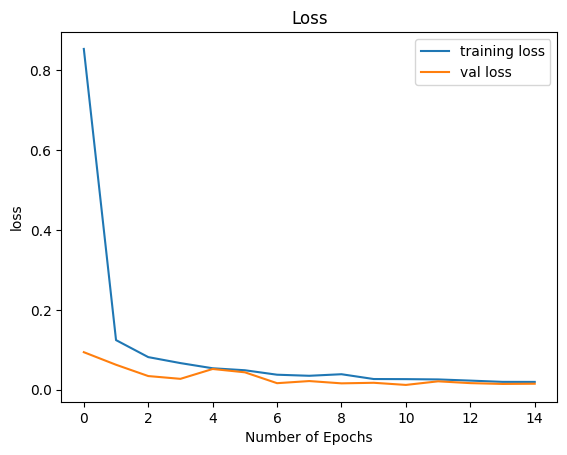

In [29]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()

In [30]:
model.save("final_model.keras")

In [32]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)